# CS182 HW3 Coding [40 points]

In this coding homework, you will be required to complete several models for binary classification and try to find the inplicit relationship of them by yourself. 

**Good luck!**


In [124]:
from sklearn import svm
from scipy import special
import numpy as np

In [125]:
X_train = np.loadtxt('data/X_train.txt')
X_val = np.loadtxt('data/X_val.txt')
X_test = np.loadtxt('data/X_test.txt')
y_train = np.loadtxt('data/y_train.txt')
y_val = np.loadtxt('data/y_val.txt')
y_test = np.loadtxt('data/y_test.txt')

w = np.loadtxt('data/w.txt')
w0 = np.loadtxt('data/w0.txt')

## (a) Simple Perceptron

(1) Activation functions and loss functions are important parts of each neural network, and there are multiple ways of calculating them. 

 **[3 points]** In this question, we ask you to implement the **sigmoid function** and **binary cross entroy loss function** serving for the binary classification.

In [126]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def BCEloss(y_pred, y):
    return - np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

(2) **[3 points]** In this question, we ask you to implement the **softmax function** and **cross entroy loss function** serving for the multiple classification.

In [127]:
def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy_loss(y, y_pre):
    return -np.mean(np.sum(y * np.log(y_pre), axis=1))

(3) **[10 points]** Learning a simple perceptron with **batch GD** (using the given initializations $w^{init}$ and $w^{init}_{0}$) based on the training set ($X_{train}$, $y_{train}$): use the training set and the validation set to obtain a good learning rate (you can set the maximum for iterations to 50 and try different learning rate in [$10^{−4}$,  $10^{−8}$] ); output the learned model and evaluate its performance on the test set with the classification accuracy.

In [128]:
import copy
# BGD Implementation
max_iter = 50
learning_rates = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]

train_BGD_accs = []
train_BGD_w = []
train_BGD_w0 = []
best_BGD_lr = None
best_BGD_acc = 0

# compute the gradient of the loss function with respect to the weights
def BGD_grad(x, y, w, w0):
    y_pred = sigmoid(np.dot(x, w) + w0)
    grad_w = np.dot(x.T, (y_pred - y)) * (1 / (2 * x.shape[1]))
    return grad_w

# iterate and update the weights
def BatchGD(x, y, w, w0, lr, max_iter):
    for i in range(max_iter):
        w -= lr * BGD_grad(x, y, w, w0)
    return w

# predict with the updated weights
def BGD_predict(x, w, w0):
    y_pred = sigmoid(np.dot(x, w) + w0)
    return y_pred

# classification to binary
def BGD_classify(y_pred):
    y_pred_classes = np.round(y_pred)
    return y_pred_classes

for lr in learning_rates:
    w_curr = copy.deepcopy(w).reshape(-1, 1)
    w0_curr = copy.deepcopy(w0).reshape(-1, 1)
    print(X_train.T.shape, y_train.reshape(-1, 1).shape, w_curr.shape, w0_curr.shape, lr, max_iter)
    BatchGD(X_train.T, y_train.reshape(-1, 1), w_curr, w0_curr, lr, max_iter)
    # predict on validation set
    y_pred = BGD_predict(X_val.T, w_curr, w0_curr)
    y_pred_classes = BGD_classify(y_pred.reshape(-1, 1)).reshape(-1)
    acc = np.mean(y_pred_classes == y_val)
    train_BGD_accs.append(acc)
    train_BGD_w.append(w_curr)
    train_BGD_w0.append(w0_curr)

best_BGD_acc = max(train_BGD_accs)
best_BGD_lr = learning_rates[train_BGD_accs.index(best_BGD_acc)]

print("Best learning rate:", best_BGD_lr)
print("Best accuracy on train:", best_BGD_acc)
print("Best Model weights:\n", train_BGD_w[train_BGD_accs.index(best_BGD_acc)])
print("Best Model bias:", train_BGD_w0[train_BGD_accs.index(best_BGD_acc)])


(7000, 20) (7000, 1) (20, 1) (1, 1) 0.0001 50
(7000, 20) (7000, 1) (20, 1) (1, 1) 1e-05 50
(7000, 20) (7000, 1) (20, 1) (1, 1) 1e-06 50
(7000, 20) (7000, 1) (20, 1) (1, 1) 1e-07 50
(7000, 20) (7000, 1) (20, 1) (1, 1) 1e-08 50
Best learning rate: 0.0001
Best accuracy on train: 0.97
Best Model weights:
 [[-0.12671047]
 [-0.11962769]
 [-0.11669877]
 [-0.12621546]
 [-0.12178165]
 [-0.12109535]
 [-0.12320885]
 [-0.12065023]
 [-0.12631277]
 [-0.11899523]
 [-0.12389209]
 [-0.11669966]
 [-0.12400644]
 [-0.12341878]
 [-0.12122757]
 [-0.12278914]
 [-0.12500693]
 [-0.11854638]
 [-0.12232647]
 [-0.12065187]]
Best Model bias: [[0.]]


In [129]:
# Evaluation with Sigmoid function
# evaluate on test set
w_eval = train_BGD_w[train_BGD_accs.index(best_BGD_acc)]
w0_eval = train_BGD_w0[train_BGD_accs.index(best_BGD_acc)]
y_pred = BGD_predict(X_test.T, w_eval, w0_eval)
y_pred_classes = BGD_classify(y_pred.reshape(-1, 1)).reshape(-1)
acc = np.mean(y_pred_classes == y_test)
print("Accuracy on test:", acc)

Accuracy on test: 0.985


(4) **[10 points]** Learning a simple perceptron with **SGD** (using the given initializations $w^{init}$ and $w^{init}_{0}$) based on the training set ($X_{train}$, $y_{train}$): use the training set and the validation set to obtain a good learning rate(you can set the maximum for iterations and try different learning rate); output the learned model and evaluate its performance on the test set with the classification accuracy.

In [130]:
# SGD Implementation
import copy
max_iter = 50
learning_rates = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]

train_SGD_accs = []
train_SGD_w = []
train_SGD_w0 = []
best_SGD_lr = None
best_SGD_acc = 0

# compute the gradient of the loss function with respect to the weights
def SGD_grad(x, y, w, w0):
    y_pred = sigmoid(np.dot(x, w) + w0)
    grad_w = np.dot(x.reshape((x.shape[0], 1)) , (y_pred - y)).reshape((x.shape[0], 1)) * 1 / 2
    return grad_w

# iterate and update the weights
def StochasticGD(x, y, w, w0, lr, max_iter):
    for i in range(max_iter):
        index = np.random.randint(0, y.shape[0])
        w -= lr * SGD_grad(x[index], y[index], w, w0)
    return w

# predict with the updated weights
def SGD_predict(x, w, w0):
    y_pred = sigmoid(np.dot(x, w) + w0)
    return y_pred

# classification to binary
def SGD_classify(y_pred):
    y_pred_classes = np.round(y_pred)
    return y_pred_classes

for lr in learning_rates:
    w_curr = copy.deepcopy(w).reshape(-1, 1)
    w0_curr = copy.deepcopy(w0).reshape(-1, 1)
    StochasticGD(X_train.T, y_train.reshape(-1, 1), w_curr, w0_curr, lr, max_iter)
    # predict on validation set
    y_pred = SGD_predict(X_val.T, w_curr, w0_curr)
    y_pred_classes = SGD_classify(y_pred.reshape(-1, 1)).reshape(-1)
    acc = np.mean(y_pred_classes == y_val)
    train_SGD_accs.append(acc)
    train_SGD_w.append(w_curr)
    train_SGD_w0.append(w0_curr)

best_SGD_acc = max(train_SGD_accs)
best_SGD_lr = learning_rates[train_SGD_accs.index(best_SGD_acc)]

print("Best learning rate:", best_SGD_lr)
print("Best accuracy on train:", best_SGD_acc)
print("Best Model weights:\n", train_SGD_w[train_SGD_accs.index(best_SGD_acc)])
print("Best Model bias:", train_SGD_w0[train_SGD_accs.index(best_SGD_acc)])

Best learning rate: 0.0001
Best accuracy on train: 0.98
Best Model weights:
 [[-0.00058422]
 [-0.00048122]
 [-0.00024438]
 [-0.00047467]
 [-0.00086215]
 [-0.0008303 ]
 [-0.00044239]
 [-0.00057772]
 [-0.00103831]
 [-0.00054353]
 [-0.00064284]
 [-0.00045443]
 [-0.00062141]
 [-0.00051802]
 [-0.00048745]
 [-0.00066961]
 [-0.00084772]
 [-0.00050513]
 [-0.00041982]
 [-0.00029463]]
Best Model bias: [[0.]]


In [131]:
# Evaluation with Sigmoid function
# evaluate on test set
w_eval = train_SGD_w[train_SGD_accs.index(best_SGD_acc)]
w0_eval = train_SGD_w0[train_SGD_accs.index(best_SGD_acc)]
y_pred = SGD_predict(X_test.T, w_eval, w0_eval)
y_pred_classes = SGD_classify(y_pred.reshape(-1, 1)).reshape(-1)
acc = np.mean(y_pred_classes == y_test)
print("Accuracy on test:", acc)

Accuracy on test: 0.97


## (b) SVM

(1) **[10 points]** Use the function **‘svm’** in package **‘sklearn’** to do the binary classification. Output the model and evaluate its performance on each dataset with the classification accuracy.

In [132]:
# SVM Implementation
clf = svm.SVC()
clf.fit(X_train.T, y_train)
y_train_pred = clf.predict(X_train.T)
y_val_pred = clf.predict(X_val.T)
y_test_pred = clf.predict(X_test.T)
print("Accuracy on train:", np.mean(y_train_pred == y_train))
print("Accuracy on val:", np.mean(y_val_pred == y_val))
print("Accuracy on test:", np.mean(y_test_pred == y_test))
print("SVM Model weights:\n", clf.support_vectors_)
print("SVM Model bias:", clf.intercept_)

Accuracy on train: 0.9864285714285714
Accuracy on val: 0.98
Accuracy on test: 0.965
SVM Model weights:
 [[ 0.68933533 -0.17852867  0.5360221  ...  1.70763393  0.69389016
   2.14809057]
 [ 0.31145582 -0.19358084 -0.03407853 ... -1.34018377  0.84527418
  -0.63497673]
 [ 0.45213304 -0.08232171 -1.09025721 ...  0.56799859  0.21866164
  -0.64653768]
 ...
 [ 1.90582843  0.38801337  0.01954115 ... -0.05619099 -0.63951714
  -0.99336592]
 [-0.45400191 -0.98572412  1.63605467 ...  0.67819234 -0.02417593
   0.15190132]
 [-1.39154215  0.29697492 -0.37744716 ... -0.55750005  0.18393128
  -0.44963465]]
SVM Model bias: [0.02212088]


## (c) Compare

(1) **[4 points]** Try to compare  models learned from (a)(3), (a)(4) and (b). Write down your explanation and data support.

----------max_iter: 100 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.98
SVM Accuracy on test: 0.965
----------max_iter: 200 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.98
SVM Accuracy on test: 0.965
----------max_iter: 300 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.985
SVM Accuracy on test: 0.965
----------max_iter: 400 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.985
SVM Accuracy on test: 0.965
----------max_iter: 500 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.985
SVM Accuracy on test: 0.965
----------max_iter: 600 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.985
SVM Accuracy on test: 0.965
----------max_iter: 700 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.98
SVM Accuracy on test: 0.965
----------max_iter: 800 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.985
SVM Accuracy on test: 0.965
----------max_iter: 900 ----------
BGD Accuracy on 

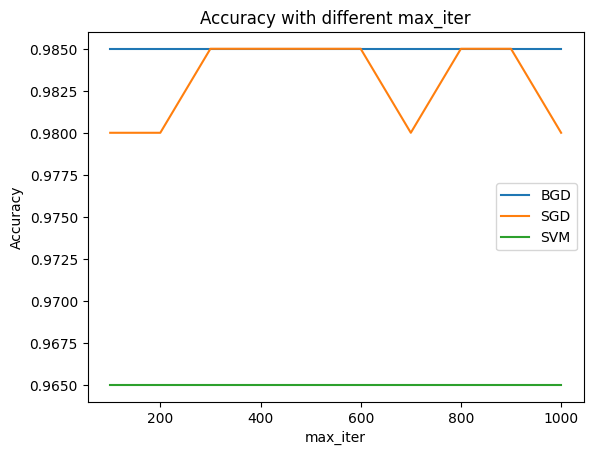

In [138]:
import matplotlib.pyplot as plt

# Evaluation with BGD under learning rate 1e-4 with different max_iter
# evaluate on test set with best model
# max_iter varies from 1 to 100 with step 10
max_iters = [i for i in range(100, 1001, 100)]
test_BGD_accs = []
test_SGD_accs = []
test_SVM_accs = []
for max_iter in max_iters:
    print("----------max_iter:", max_iter, "----------")
    # BGD
    w_curr = copy.deepcopy(w).reshape(-1, 1)
    w0_curr = copy.deepcopy(w0).reshape(-1, 1)
    BatchGD(X_train.T, y_train.reshape(-1, 1), w_curr, w0_curr, 1e-4, max_iter)
    # predict on validation set
    y_pred_BGD = BGD_predict(X_test.T, w_curr, w0_curr)
    y_pred_classes_BGD = BGD_classify(y_pred_BGD.reshape(-1, 1)).reshape(-1)
    acc_BGD = np.mean(y_pred_classes_BGD == y_test)
    test_BGD_accs.append(acc_BGD)
    # SGD
    w_curr = copy.deepcopy(w).reshape(-1, 1)
    w0_curr = copy.deepcopy(w0).reshape(-1, 1)
    StochasticGD(X_train.T, y_train.reshape(-1, 1), w_curr, w0_curr, 1e-4, max_iter)
    # predict on validation set
    y_pred_SGD = SGD_predict(X_test.T, w_curr, w0_curr)
    y_pred_classes_SGD = SGD_classify(y_pred_SGD.reshape(-1, 1)).reshape(-1)
    acc_SGD = np.mean(y_pred_classes_SGD == y_test)
    test_SGD_accs.append(acc_SGD)
    # SVM
    clf.fit(X_train.T, y_train)
    y_pred_SVM = clf.predict(X_test.T)
    acc_SVM = np.mean(y_pred_SVM == y_test)
    test_SVM_accs.append(acc_SVM)

    print("BGD Accuracy on test:", acc_BGD)
    print("SGD Accuracy on test:", acc_SGD)
    print("SVM Accuracy on test:", acc_SVM)

# plot the accuracy with different max_iter
plt.plot(max_iters, test_BGD_accs, label="BGD")
plt.plot(max_iters, test_SGD_accs, label="SGD")
plt.plot(max_iters, test_SVM_accs, label="SVM")
plt.xlabel("max_iter")
plt.ylabel("Accuracy")
plt.title("Accuracy with different max_iter")
plt.legend()
plt.show()

---------- 10 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.975
SVM Accuracy on test: 0.965
---------- 20 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.98
SVM Accuracy on test: 0.965
---------- 30 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.98
SVM Accuracy on test: 0.965
---------- 40 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.975
SVM Accuracy on test: 0.965
---------- 50 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.965
SVM Accuracy on test: 0.965
---------- 60 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.99
SVM Accuracy on test: 0.965
---------- 70 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.975
SVM Accuracy on test: 0.965
---------- 80 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.985
SVM Accuracy on test: 0.965
---------- 90 ----------
BGD Accuracy on test: 0.985
SGD Accuracy on test: 0.975
SVM Accuracy on test: 0.965


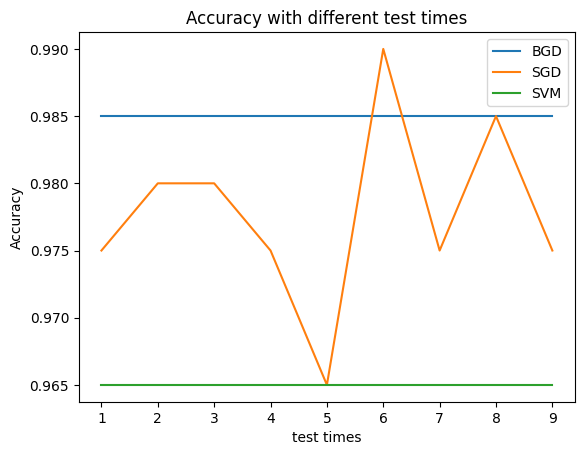

In [134]:
import matplotlib.pyplot as plt

# evaluate on test set with best model
# test for 10 times with same learning rate and same max_iter 50
test_BGD_accs = []
test_SGD_accs = []
test_SVM_accs = []
for i in range(10, 100, 10):
    print("----------", i, "----------")
    # BGD
    w_curr = copy.deepcopy(w).reshape(-1, 1)
    w0_curr = copy.deepcopy(w0).reshape(-1, 1)
    BatchGD(X_train.T, y_train.reshape(-1, 1), w_curr, w0_curr, 1e-4, 50)
    # predict on validation set
    y_pred_BGD = BGD_predict(X_test.T, w_curr, w0_curr)
    y_pred_classes_BGD = BGD_classify(y_pred_BGD.reshape(-1, 1)).reshape(-1)
    acc_BGD = np.mean(y_pred_classes_BGD == y_test)
    test_BGD_accs.append(acc_BGD)
    # SGD
    w_curr = copy.deepcopy(w).reshape(-1, 1)
    w0_curr = copy.deepcopy(w0).reshape(-1, 1)
    StochasticGD(X_train.T, y_train.reshape(-1, 1), w_curr, w0_curr, 1e-4, 50)
    # predict on validation set
    y_pred_SGD = SGD_predict(X_test.T, w_curr, w0_curr)
    y_pred_classes_SGD = SGD_classify(y_pred_SGD.reshape(-1, 1)).reshape(-1)
    acc_SGD = np.mean(y_pred_classes_SGD == y_test)
    test_SGD_accs.append(acc_SGD)
    # SVM
    clf.fit(X_train.T, y_train)
    y_pred_SVM = clf.predict(X_test.T)
    acc_SVM = np.mean(y_pred_SVM == y_test)
    test_SVM_accs.append(acc_SVM)

    print("BGD Accuracy on test:", acc_BGD)
    print("SGD Accuracy on test:", acc_SGD)
    print("SVM Accuracy on test:", acc_SVM)

# plot the accuracy with different max_iter
plt.plot([i for i in range(1, 10)], test_BGD_accs, label="BGD")
plt.plot([i for i in range(1, 10)], test_SGD_accs, label="SGD")
plt.plot([i for i in range(1, 10)], test_SVM_accs, label="SVM")
plt.xlabel("test times")
plt.ylabel("Accuracy")
plt.title("Accuracy with different test times")
plt.legend()
plt.show()

# conclusion

So, according to the data we get, we find that:

BGD always has a better performance than SVM, and SGD due to the random gradient descent, it's performance is not stable, sometimes it's better than BGD, sometimes it's worse than BGD. Also, with different test times, the performance of SGD is different, but the performance of BGD and SVM is always the same.

This is because:

BGD updates the model parameters based on the entire training dataset, which can lead to slow convergence speed compared to SGD. However, BGD can achieve better convergence to the global minimum if the loss function is convex. BGD also has a stable direction and smooth convergence path.

SGD updates model parameters based on each individual sample in the training set. It can converge faster than BGD while maintaining loss reduction, but its progress tends to be more oscillatory and noisy. In addition, the model parameters obtained by SGD  are more prone to overfitting noise in individual samples. However, it can achieve better generalization performance in large data sets by escaping from sharp local minima.

SVM models aim to maximize the margin between two classes by finding the optimal "hyperplane" that separates the data points. SVM classification performance is thus superior when the classes are well separated while still being able to generalize when some misclassifications occur. SVM models can use kernel functions to non-linearly transform the input space into higher dimensions, which effectively improves the model's more complex decision boundaries.